<a href="https://colab.research.google.com/github/hussain033/CodeClause_MovieRecommenderSystem_MohamedHussain/blob/main/Task_2_Movie_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recommender System
###Using Movielens Dataset and KNN algorithm

##Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Loading the dataset

In [ ]:
ratingdf = pd.read_csv('/content/drive/MyDrive/datasets/ratings.csv')
moviedf = pd.read_csv('/content/drive/MyDrive/datasets/movies.csv')

In [ ]:
ratingdf.shape, moviedf.shape

((100836, 4), (9742, 3))

##Analysing and Visualing data

In [ ]:
ratingdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
moviedf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratingdf.info(), moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


(None, None)

In [ ]:
ratingdf.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
moviedf.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


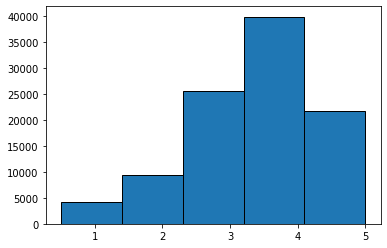

In [ ]:
plt.hist(ratingdf['rating'], bins = 5,edgecolor="black")
plt.show()

In [ ]:
moviedf.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
ratingdf.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

##Preprocessing Data

In [ ]:
movie = moviedf.loc[:,{"movieId","title"}]
rating = ratingdf.loc[:,{"userId","movieId","rating"}]

In [ ]:
data = pd.merge(ratingdf, moviedf, on='movieId')

In [ ]:
# Pivot the table to create a matrix of users and their ratings
ratings_matrix = data.pivot_table(index='title', columns='userId', values='rating')


In [ ]:
ratings_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix.isna().sum()

userId
1      9487
2      9690
3      9680
4      9503
5      9675
       ... 
606    8604
607    9532
608    8888
609    9682
610    8417
Length: 610, dtype: int64

In [ ]:
ratings_matrix = ratings_matrix.fillna(0)

In [ ]:
ratings_matrix.shape

(9719, 610)

##Model

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')

In [ ]:
knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

##Testing the System

In [ ]:
query_index = np.random.choice(ratings_matrix.shape[0])
print("Choosen Movie is: ",ratings_matrix.index[query_index])

Choosen Movie is:  Final Destination 2 (2003)


In [ ]:
movie_title = 'Toy Story (1995)'
movie_index = ratings_matrix.index.get_loc(movie_title)
distances, indices = knn.kneighbors(ratings_matrix.iloc[movie_index,:].values.reshape(1,-1), n_neighbors=11)



In [ ]:
# Print the titles of the 10 most similar movies
movie = []
distance = []

for i in range(0, len(distances.flatten())):
    if i != 0:
        movie.append(ratings_matrix.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])    

m=pd.Series(movie,name='movie')
d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=True)

print('Recommendations for {0}:\n'.format(ratings_matrix.index[query_index]))
for i in range(0,recommend.shape[0]):
    print('{0}: {1}, with distance of {2}'.format(i+1, recommend["movie"].iloc[i], recommend["distance"].iloc[i]))

Recommendations for Final Destination 2 (2003):

1: Toy Story 2 (1999), with distance of 0.4273987396802844
2: Jurassic Park (1993), with distance of 0.4343631959138434
3: Independence Day (a.k.a. ID4) (1996), with distance of 0.43573830647233414
4: Star Wars: Episode IV - A New Hope (1977), with distance of 0.4426118294200634
5: Forrest Gump (1994), with distance of 0.45290409205982585
6: Lion King, The (1994), with distance of 0.4588546505397666
7: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.458910695227416
8: Mission: Impossible (1996), with distance of 0.4610872294416424
9: Groundhog Day (1993), with distance of 0.4658312374156559
